In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, make_scorer, f1_score)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import time

from sklearn.neural_network import MLPClassifier  # 核心MLP实现
from sklearn.exceptions import ConvergenceWarning      # 处理收敛警告
import warnings                                        # 警告管理

### 1. Data Loading

In [13]:
# Load the dataset
X_train_df = pd.read_csv('X_train.csv', header = 0) # Keep the first row, which are the titles
X_test_df = pd.read_csv('X_test.csv', header = 0)
X_train = X_train_df.values # Convert to numpy array
X_test = X_test_df.values
y_train = pd.read_csv('y_train.csv', header = 0).squeeze() # Extract Series from single-column DataFrame
y_test = pd.read_csv("y_test.csv", header = 0).squeeze()

# Save the list of feature names
feature_columns = X_train_df.columns.tolist 

### 2. Preprocessing

In [14]:
# Adjust the label to start from 0 to meet the requirement of XGBoost
min_label = min(y_train.min(), y_test.min())
if min_label > 0:
    y_train -= min_label
    y_test -= min_label
    print(f"Adjusted the label to start from 0: {np.unique(y_train)}")

# Standardize to improve the model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

Adjusted the label to start from 0: [0 1 2 3 4 5]


### 3. Model Training
##### Model Configuration Update & Enhanced Training Protocol

In [15]:
MODEL_CONFIG = {
    'LogisticRegression': {
        'class': LogisticRegression,
        'params': {'max_iter': 1000, 'class_weight': 'balanced'}
    },
    'RandomForest': {
        'class': RandomForestClassifier,
        'params': {'n_estimators': 200, 'max_depth': 10, 'class_weight': 'balanced'}
    },
    'SVM': {
        'class': SVC,
        'params': {'kernel': 'rbf', 'C': 1.0, 'class_weight': 'balanced'}
    },
    'XGBoost': {
        'class': XGBClassifier,
        'params': {'eval_metric': 'logloss'}
    },
    'MLP': {
        'class': MLPClassifier,
        'params': {
            'hidden_layer_sizes': (100, 50),  # Two hidden layers
            'activation': 'relu',
            'solver': 'adam',
            'early_stopping': True,
            'max_iter': 500,
            'learning_rate_init': 0.001,
            'batch_size': 256
        }
    }
}

def train_models(X_train, y_train):
    trained_models = {}
    for model_name, config in MODEL_CONFIG.items():
        print(f"\nTraining {model_name}...")
        start_time = time.time()
        
        # model initialization
        model = config['class'](**config['params'])
        
        # Special handling for MLP convergence warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model.fit(X_train, y_train)
        # Track loss curve for neural networks
        loss_curve = None
        if hasattr(model, 'loss_curve_'):
            loss_curve = model.loss_curve_
        
        # record the model date
        trained_models[model_name] = {
            'model': model,
            'train_time': time.time() - start_time,
            'feature_importances': getattr(model, 'feature_importances_', None),
            'loss_curve': loss_curve
        }
        
    return trained_models

trained_models = train_models(X_train_scaled, y_train)


Training LogisticRegression...

Training RandomForest...

Training SVM...

Training XGBoost...

Training MLP...


### 4. Neural Network-Specific Analysis
##### Add diagnostic visualizations. 

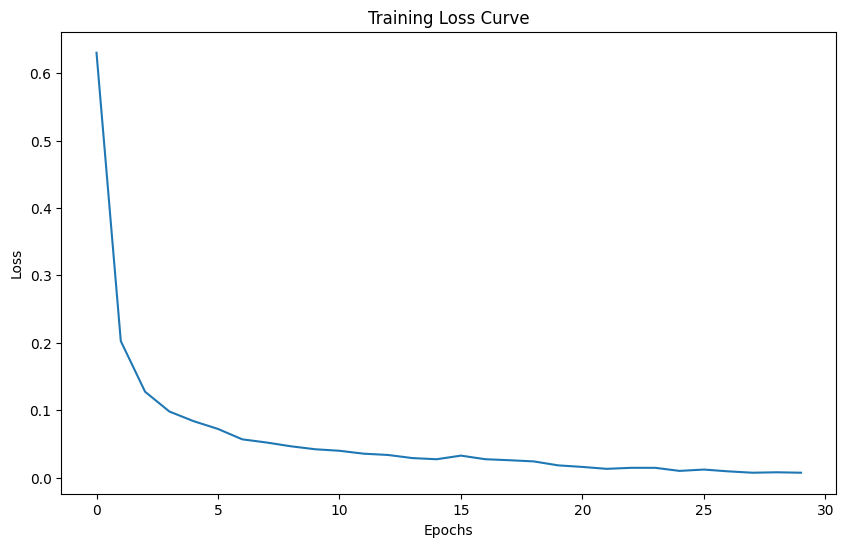

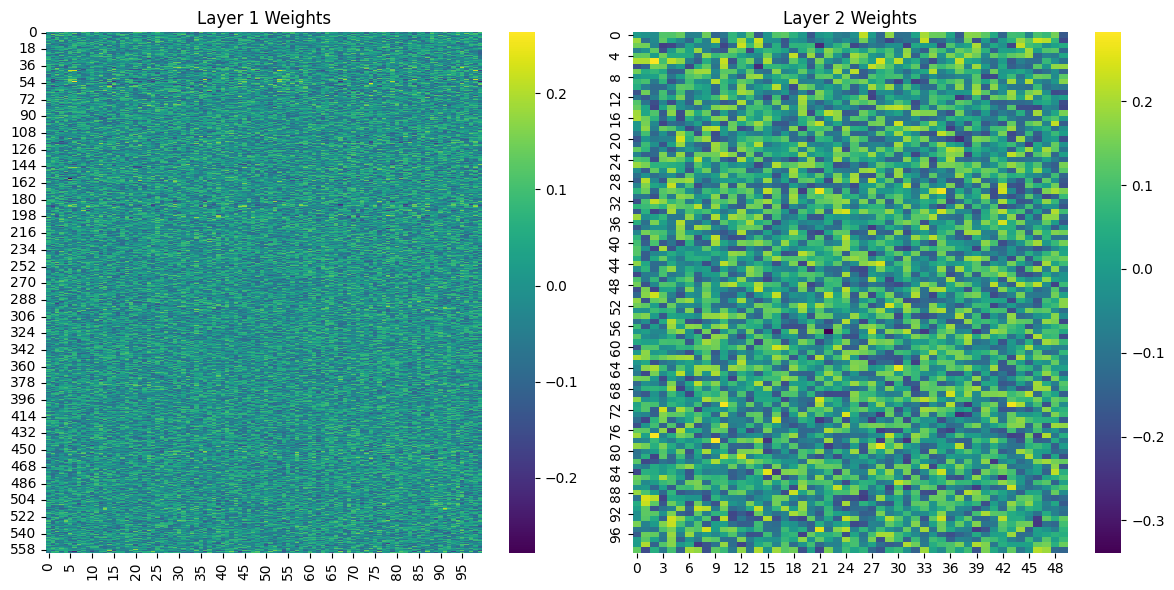

<Figure size 600x600 with 0 Axes>

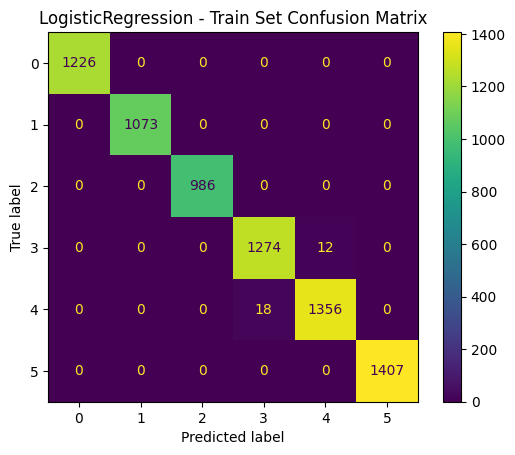

<Figure size 600x600 with 0 Axes>

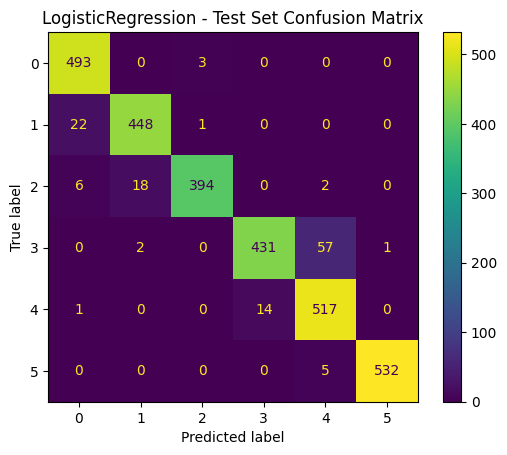

<Figure size 600x600 with 0 Axes>

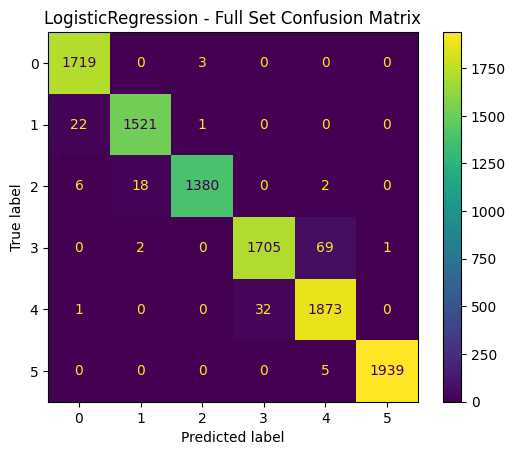

<Figure size 600x600 with 0 Axes>

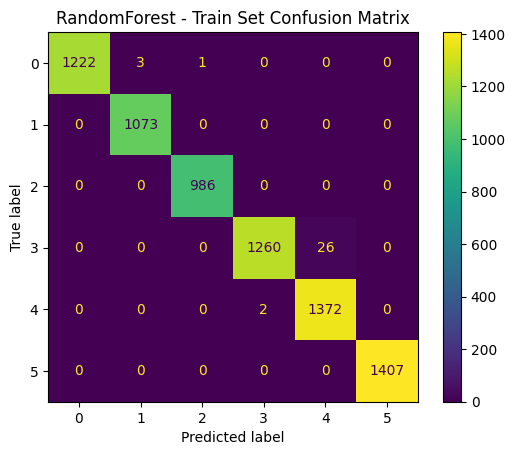

<Figure size 600x600 with 0 Axes>

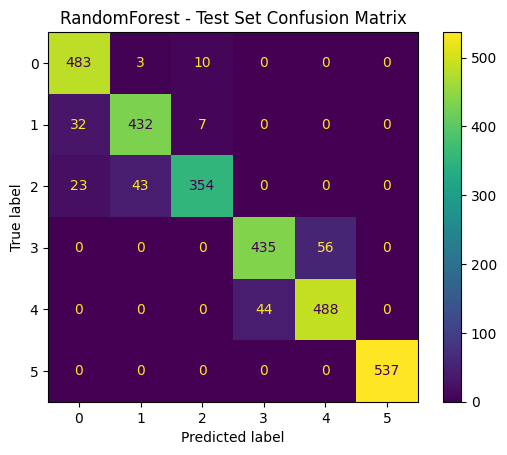

<Figure size 600x600 with 0 Axes>

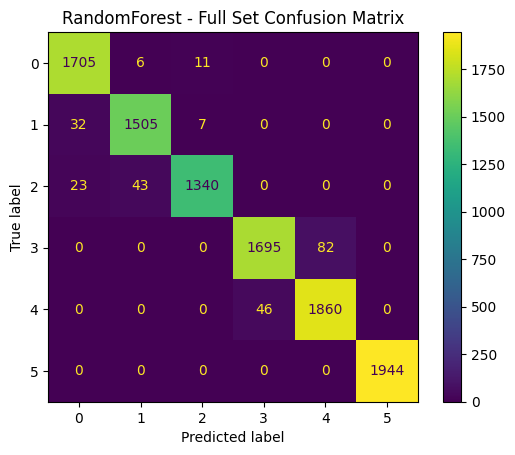

<Figure size 600x600 with 0 Axes>

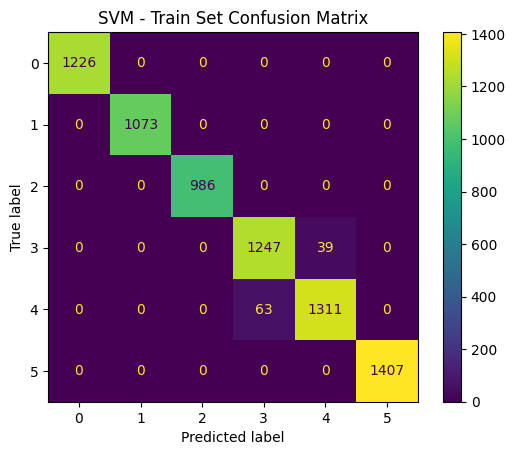

<Figure size 600x600 with 0 Axes>

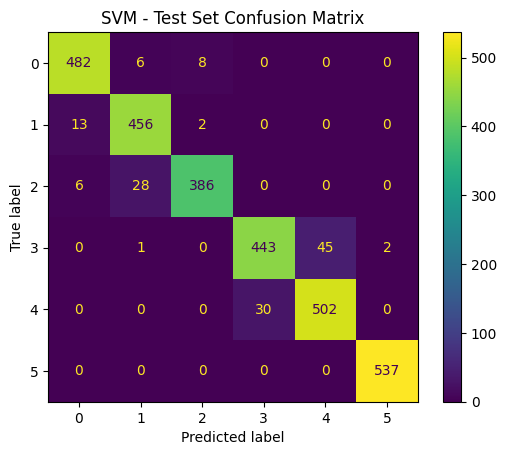

<Figure size 600x600 with 0 Axes>

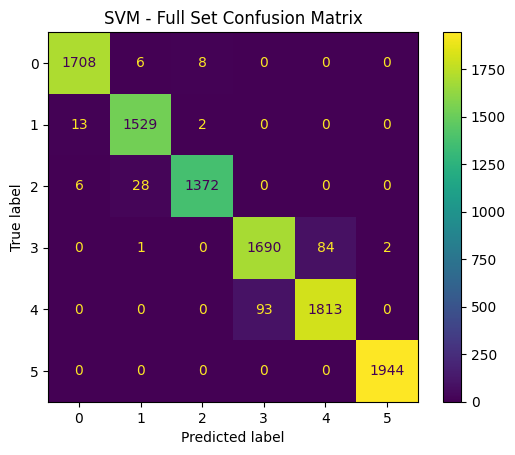

<Figure size 600x600 with 0 Axes>

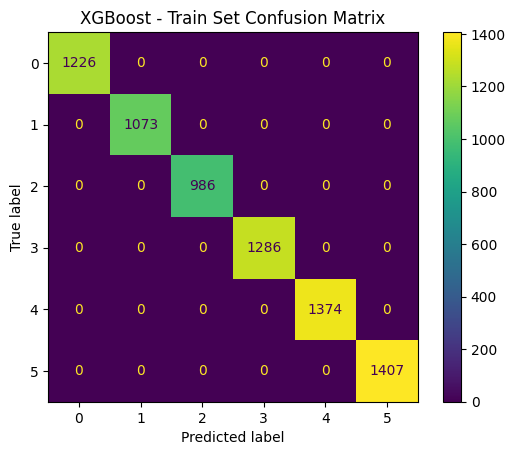

<Figure size 600x600 with 0 Axes>

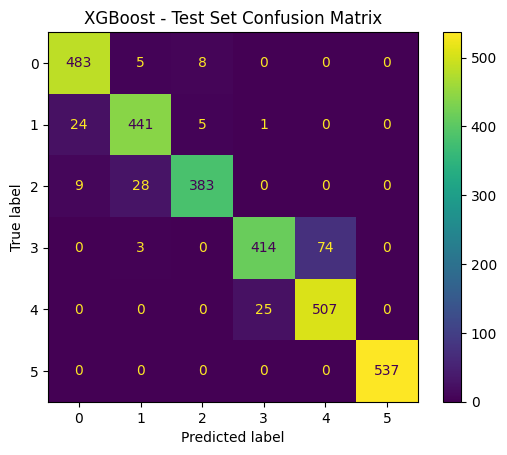

<Figure size 600x600 with 0 Axes>

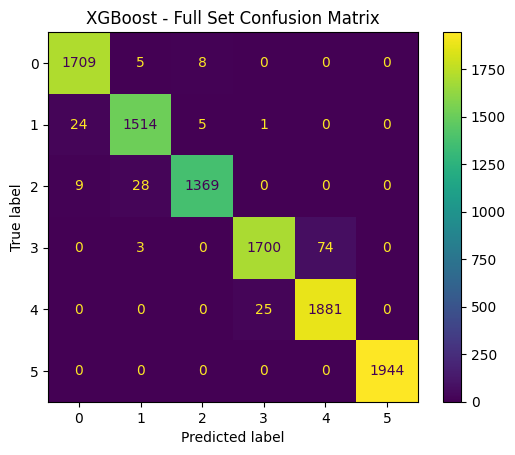

<Figure size 600x600 with 0 Axes>

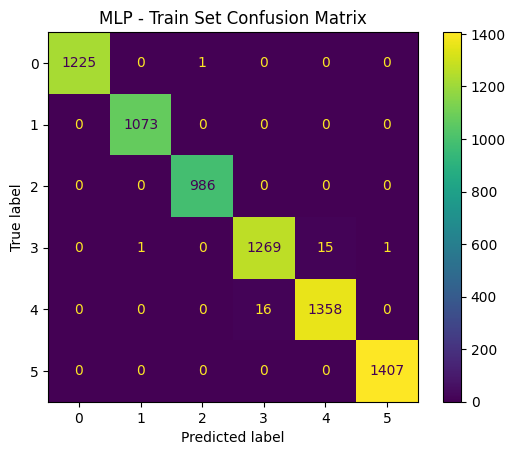

<Figure size 600x600 with 0 Axes>

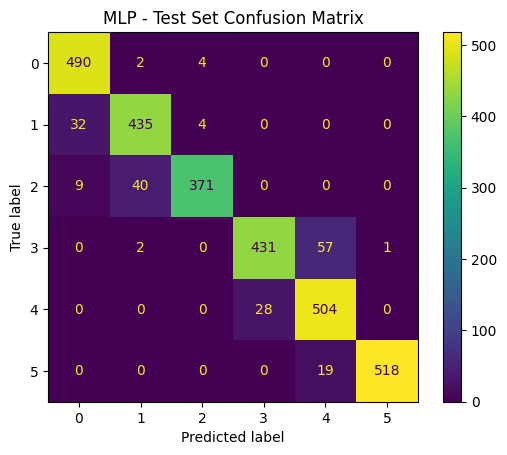

<Figure size 600x600 with 0 Axes>

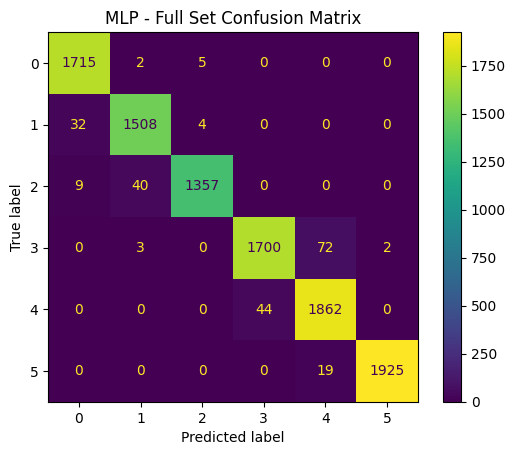


Model Performance Comparison:
                    Train Accuracy  Test Accuracy  Full Accuracy  \
LogisticRegression        0.995919       0.955209       0.984270   
RandomForest              0.995647       0.926026       0.975726   
SVM                       0.986126       0.952155       0.976405   
XGBoost                   1.000000       0.938242       0.982328   
MLP                       0.995375       0.932813       0.977474   

                    Train Precision  Test Precision  Full Precision  \
LogisticRegression         0.995924        0.956918        0.984393   
RandomForest               0.995704        0.926995        0.975865   
SVM                        0.986189        0.952531        0.976429   
XGBoost                    1.000000        0.939658        0.982462   
MLP                        0.995373        0.935146        0.977680   

                    Train Recall  Test Recall  Full Recall  Train F1  \
LogisticRegression      0.995919     0.955209     0.984270  0

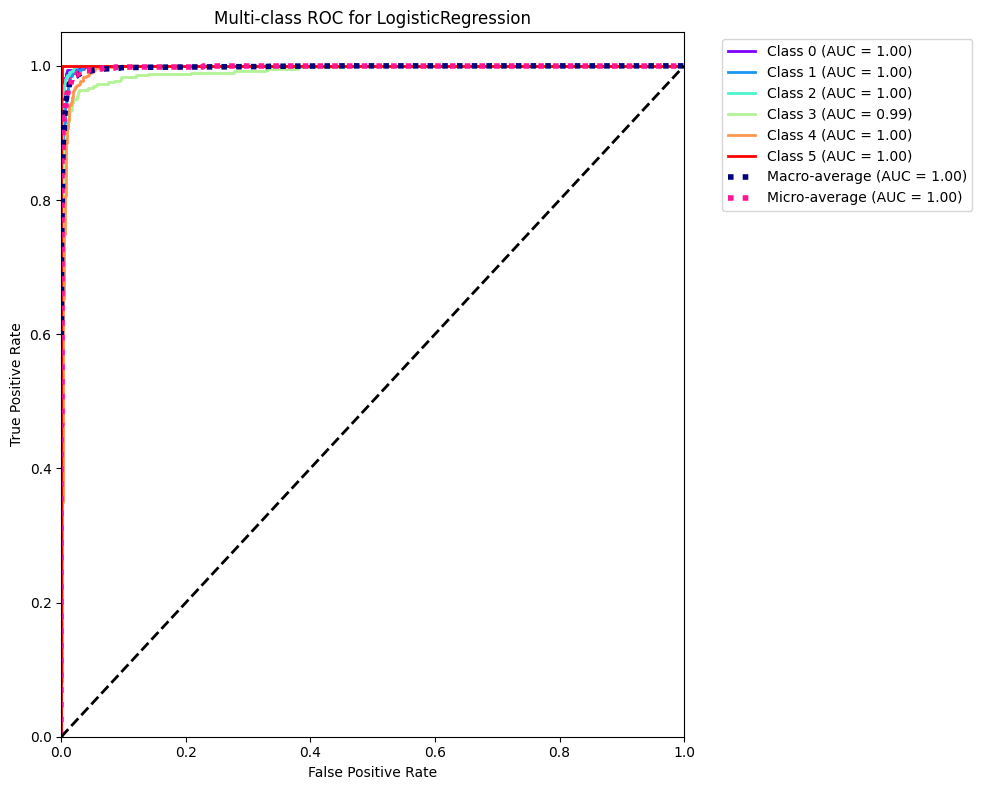


LogisticRegression AUC Summary:
  Class 0: 1.00
  Class 1: 1.00
  Class 2: 1.00
  Class 3: 0.99
  Class 4: 1.00
  Class 5: 1.00
  Macro-Average: 1.00
  Micro-Average: 1.00


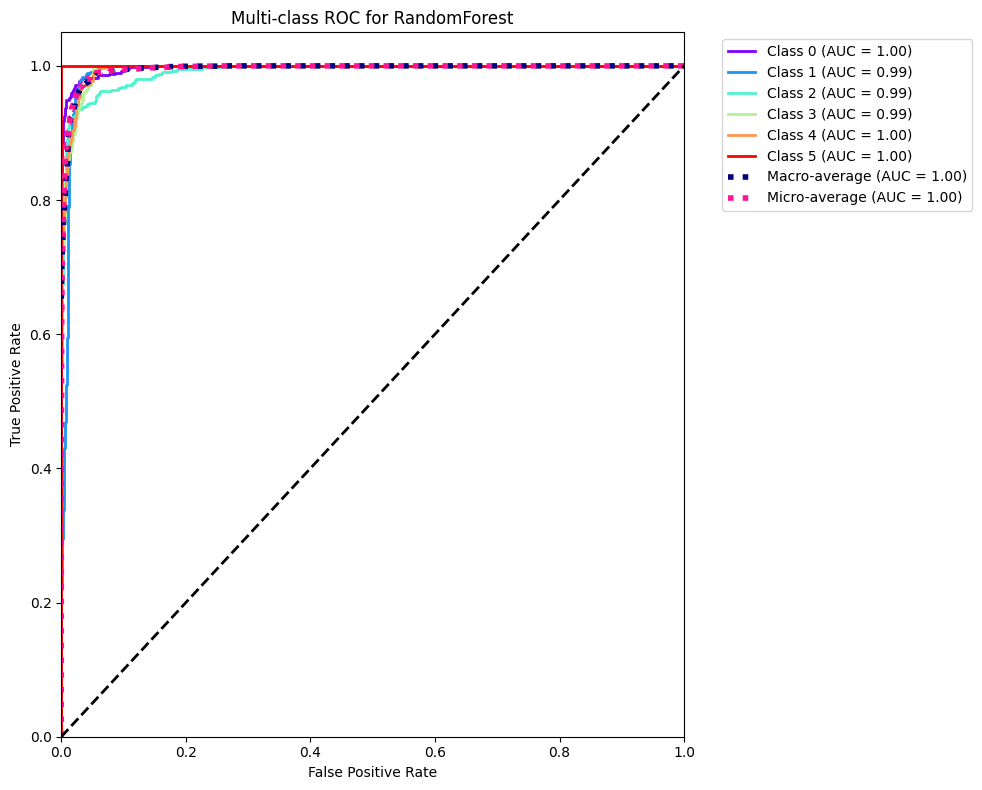


RandomForest AUC Summary:
  Class 0: 1.00
  Class 1: 0.99
  Class 2: 0.99
  Class 3: 0.99
  Class 4: 1.00
  Class 5: 1.00
  Macro-Average: 1.00
  Micro-Average: 1.00
Skipping ROC/AUC for SVM (no probability support)


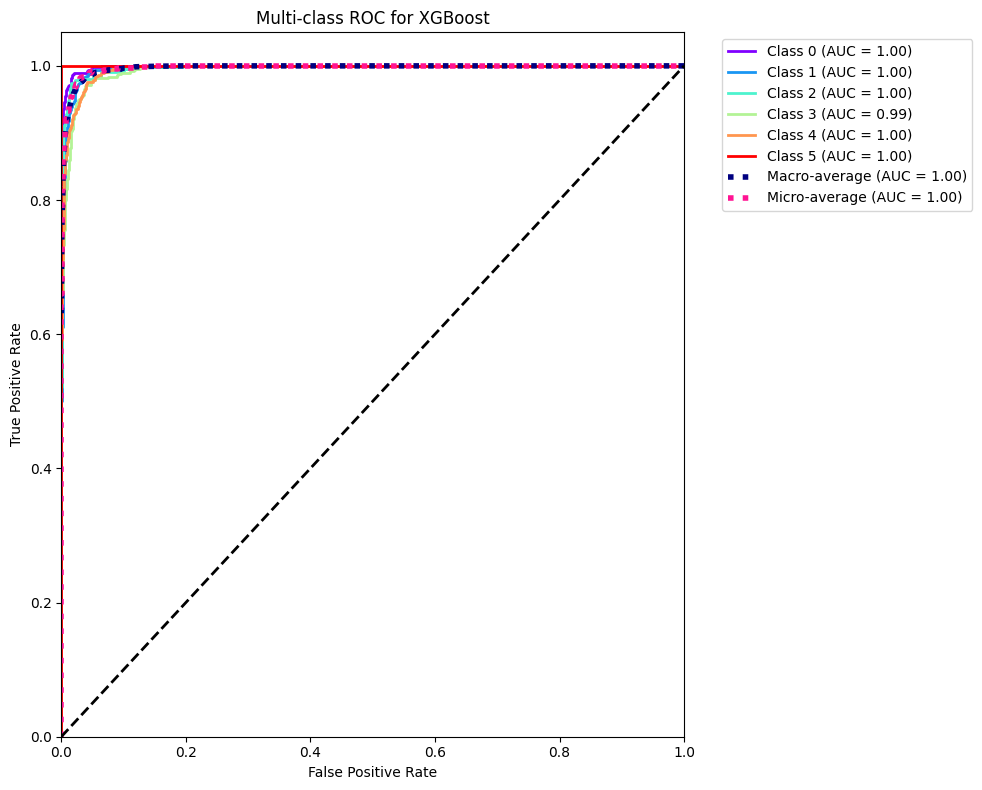


XGBoost AUC Summary:
  Class 0: 1.00
  Class 1: 1.00
  Class 2: 1.00
  Class 3: 0.99
  Class 4: 1.00
  Class 5: 1.00
  Macro-Average: 1.00
  Micro-Average: 1.00


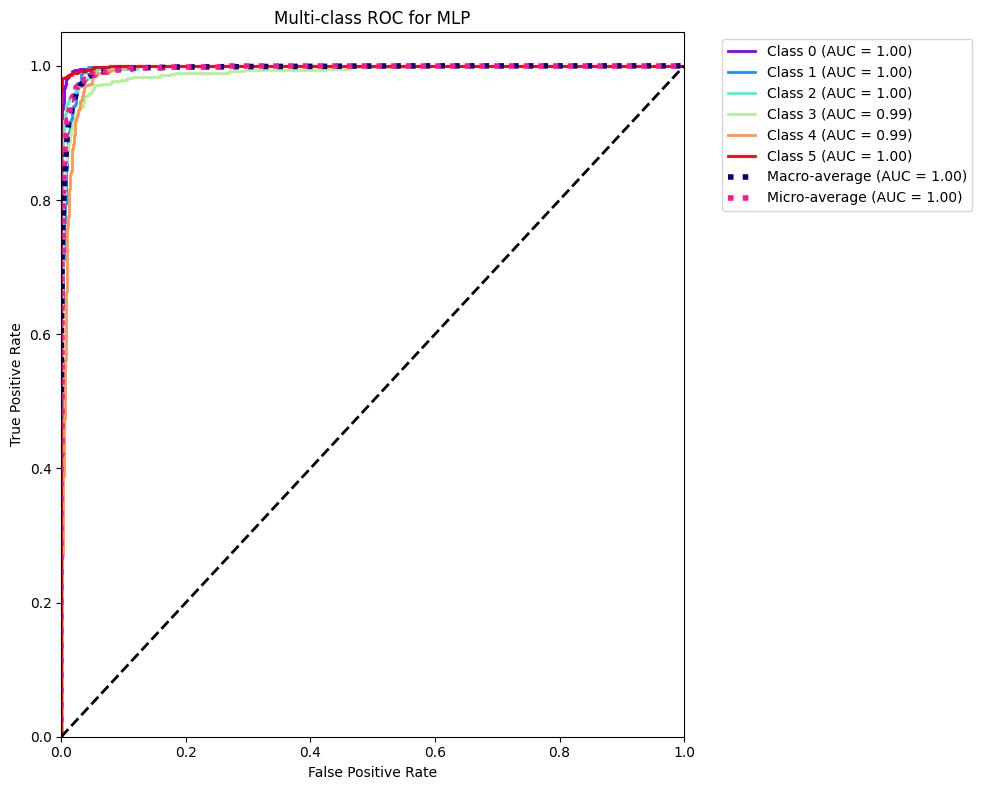


MLP AUC Summary:
  Class 0: 1.00
  Class 1: 1.00
  Class 2: 1.00
  Class 3: 0.99
  Class 4: 0.99
  Class 5: 1.00
  Macro-Average: 1.00
  Micro-Average: 1.00


In [16]:
def plot_neural_network_diagnostics(model_data):
    if model_data['loss_curve'] is not None:
        plt.figure(figsize=(10, 6))
        plt.plot(model_data['loss_curve'])
        plt.title('Training Loss Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
    # Visualize layer weights
    if isinstance(model_data['model'], MLPClassifier):
        weights = model_data['model'].coefs_
        plt.figure(figsize=(12, 6))
        for i, layer in enumerate(weights[:-1]):  # Exclude output layer
            plt.subplot(1, len(weights)-1, i+1)
            sns.heatmap(layer, cmap='viridis')
            plt.title(f'Layer {i+1} Weights')
        plt.tight_layout()
        plt.show()

def predict_all_sets(model, X_train, X_test):
    # Test the trained model on the training set, testing set and the entire set
    X_full = np.vstack([X_train, X_test])
    return {
        'train': model.predict(X_train),
        'test': model.predict(X_test),
        'full': model.predict(X_full)
    }

def evaluate_model(y_true, y_pred, dataset_name, model_name):
    # Generate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted', zero_division=0
    )
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(f'{model_name} - {dataset_name} Set Confusion Matrix')
    plt.show()
    
    return metrics

def compare_models(results):
    comparison = pd.DataFrame()
    for model_name, data in results.items():
        metrics = {
            'Train Accuracy': data['train']['accuracy'],
            'Test Accuracy': data['test']['accuracy'],
            'Full Accuracy': data['full']['accuracy'],
            'Train Precision': data['train']['precision'],
            'Test Precision': data['test']['precision'],
            'Full Precision': data['full']['precision'],
            'Train Recall': data['train']['recall'],
            'Test Recall': data['test']['recall'],
            'Full Recall': data['full']['recall'],
            'Train F1': data['train']['f1'],
            'Test F1': data['test']['f1'],
            'Full F1': data['full']['f1']            
        }
        comparison[model_name] = pd.Series(metrics)
    return comparison.T

# Generate neural network diagnostics
for name, data in trained_models.items():
    if name == 'MLP':
        plot_neural_network_diagnostics(data)

# Prediction and evaluation flow
results = {}
for model_name, model_data in trained_models.items():
    # Get predictions using scaled data
    preds = predict_all_sets(model_data['model'], X_train_scaled, X_test_scaled)
    
    # Create full dataset labels
    y_full = np.concatenate([y_train, y_test])
    
    # Evaluate all sets with visualization
    results[model_name] = {
        'train': evaluate_model(y_train, preds['train'], 'Train', model_name),
        'test': evaluate_model(y_test, preds['test'], 'Test', model_name),
        'full': evaluate_model(y_full, preds['full'], 'Full', model_name)
    }

# Generate comparison table with full set metrics
comparison_table = compare_models(results)
print("\nModel Performance Comparison:")
print(comparison_table)

# ROC and AUC
# Modify SVM configuration to enable probability estimates
MODEL_CONFIG['SVM']['params']['probability'] = True

# Function to plot ROC curves and compute AUC for each model
def plot_roc_and_calculate_auc(trained_models, X_test_scaled, y_test):
    for model_name, model_data in trained_models.items():
        model = model_data['model']
        
        # Skip models without probability estimates
        if not hasattr(model, 'predict_proba'):
            print(f"Skipping ROC/AUC for {model_name} (no probability support)")
            continue

        # Get model's class information
        model_classes = model.classes_
        n_classes = len(model_classes)
        
        # Binarize test labels according to model's classes
        y_test_bin = label_binarize(y_test, classes=model_classes)
        
        # Get predicted probabilities
        y_prob = model.predict_proba(X_test_scaled)
        
        # Initialize structures for ROC/AUC
        fpr, tpr, roc_auc = {}, {}, {}
        
        # Calculate metrics per class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Compute macro-average
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        
        # Compute micro-average
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        # Visualization
        plt.figure(figsize=(10, 8))
        colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
        
        # Plot individual classes
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'Class {model_classes[i]} (AUC = {roc_auc[i]:.2f})')
        
        # Plot averages
        plt.plot(fpr["macro"], tpr["macro"],
                 label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})',
                 color='navy', linestyle=':', linewidth=4)
        plt.plot(fpr["micro"], tpr["micro"],
                 label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
                 color='deeppink', linestyle=':', linewidth=4)
        
        # Formatting
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multi-class ROC for {model_name}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        # Print metrics
        print(f"\n{model_name} AUC Summary:")
        for i in range(n_classes):
            print(f"  Class {model_classes[i]}: {roc_auc[i]:.2f}")
        print(f"  Macro-Average: {roc_auc['macro']:.2f}")
        print(f"  Micro-Average: {roc_auc['micro']:.2f}")

# Execute ROC/AUC analysis
plot_roc_and_calculate_auc(trained_models, X_test_scaled, y_test)

### 5. Visualization


Generating Visualizations...


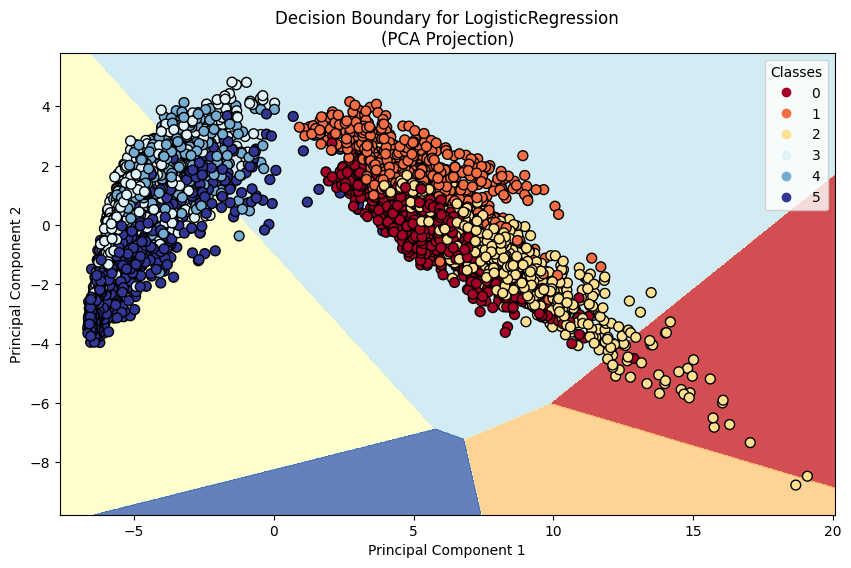

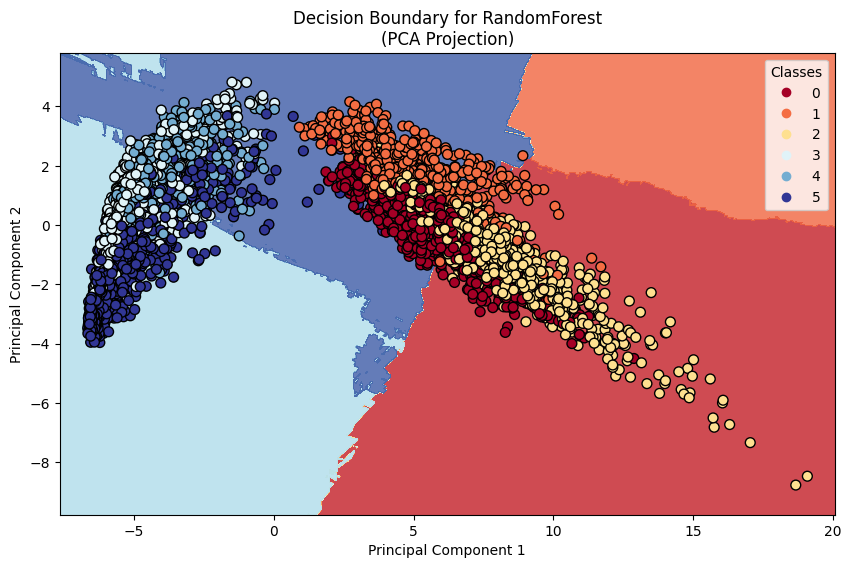

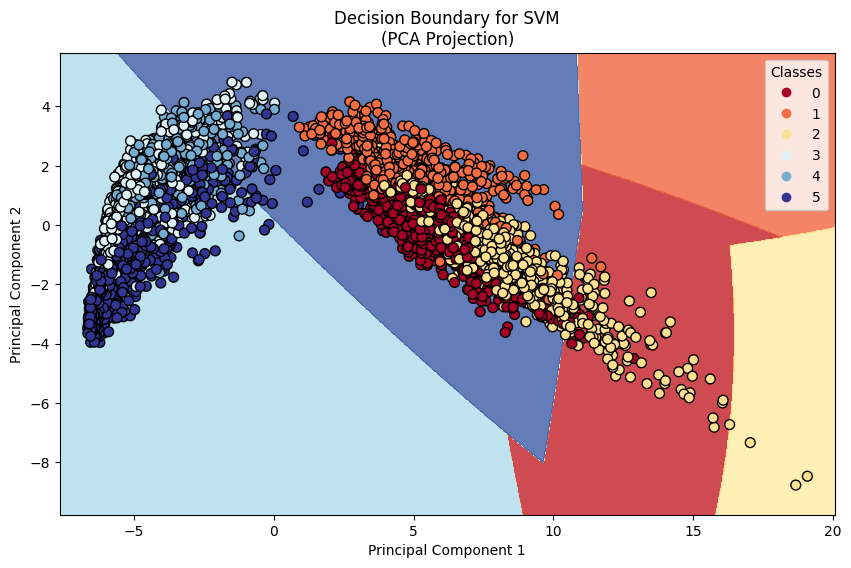

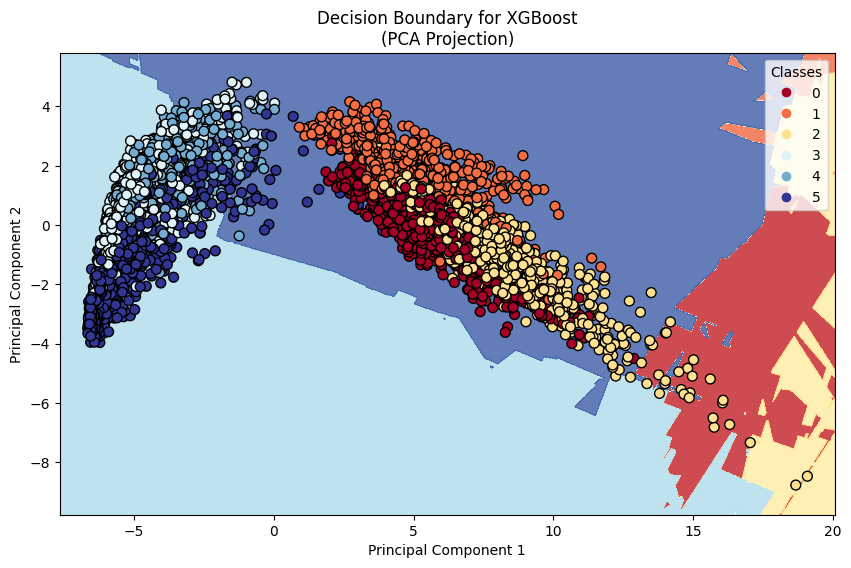

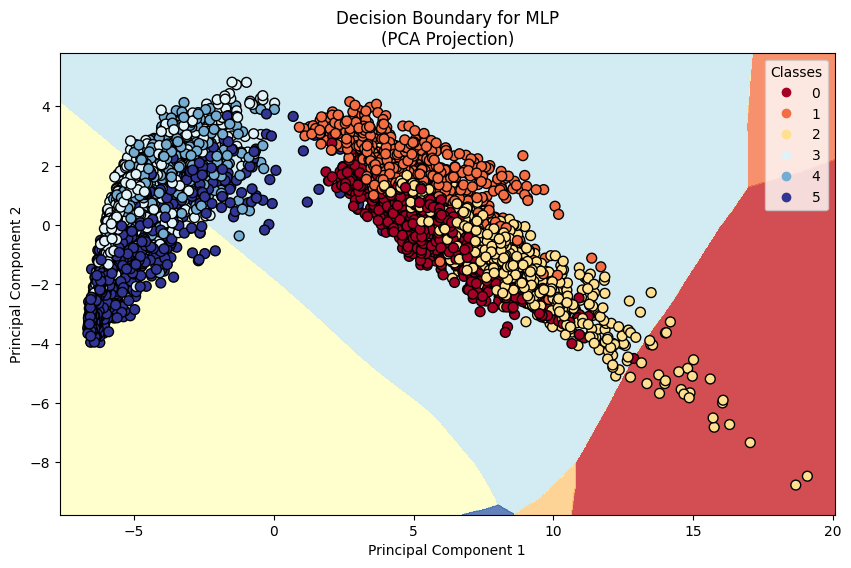

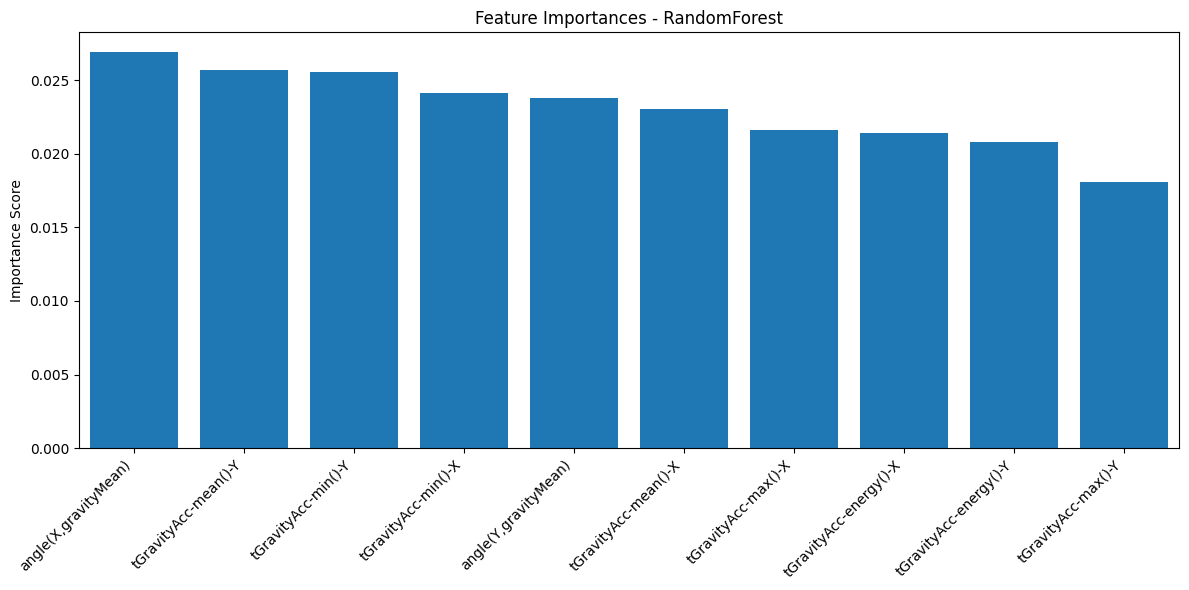

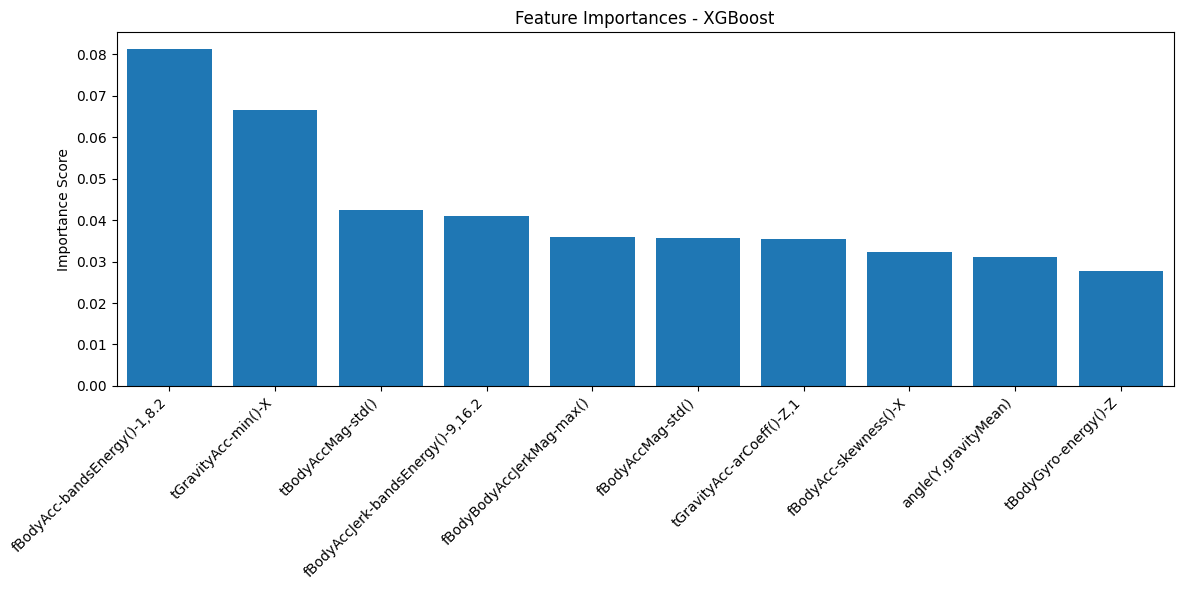

In [17]:
# Fix feature_columns definition (correct the typo)
feature_columns = X_train_df.columns.tolist()

# Visualize Decision Boundaries using PCA
def plot_decision_boundaries(trained_models, X_train, X_test, y_train):
    # Combine train and test for full PCA fit
    X_full = np.vstack([X_train, X_test])
    pca = PCA(n_components=2)
    pca.fit(X_full)
    
    # Transform both train and test
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Create mesh grid
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    for model_name, model_data in trained_models.items():
        model = model_data['model']
        plt.figure(figsize=(10, 6))
        
        # Predict on PCA meshgrid
        Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
        
        # Plot training data points
        scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
                              edgecolor='k', cmap=plt.cm.RdYlBu, s=50)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'Decision Boundary for {model_name}\n(PCA Projection)')
        plt.legend(*scatter.legend_elements(), title='Classes')
        plt.show()

# Visualize Feature Importances
def plot_feature_importances(trained_models, feature_columns):
    for model_name, model_data in trained_models.items():
        importances = model_data['feature_importances']
        if importances is not None:
            plt.figure(figsize=(12, 6))
            indices = np.argsort(importances)[::-1][:10]  # Top 10 features
            plt.title(f"Feature Importances - {model_name}")
            plt.bar(range(len(indices)), importances[indices], align='center')
            plt.xticks(range(len(indices)), [feature_columns[i] for i in indices], 
                       rotation=45, ha='right')
            plt.xlim([-0.5, len(indices)-0.5])
            plt.ylabel("Importance Score")
            plt.tight_layout()
            plt.show()

# Execute visualization functions
print("\nGenerating Visualizations...")
plot_decision_boundaries(trained_models, X_train, X_test, y_train)
plot_feature_importances(trained_models, feature_columns)

### 6. Model Improvement


=== Optimizing MLP ===
Fitting 3 folds for each of 108 candidates, totalling 324 fits


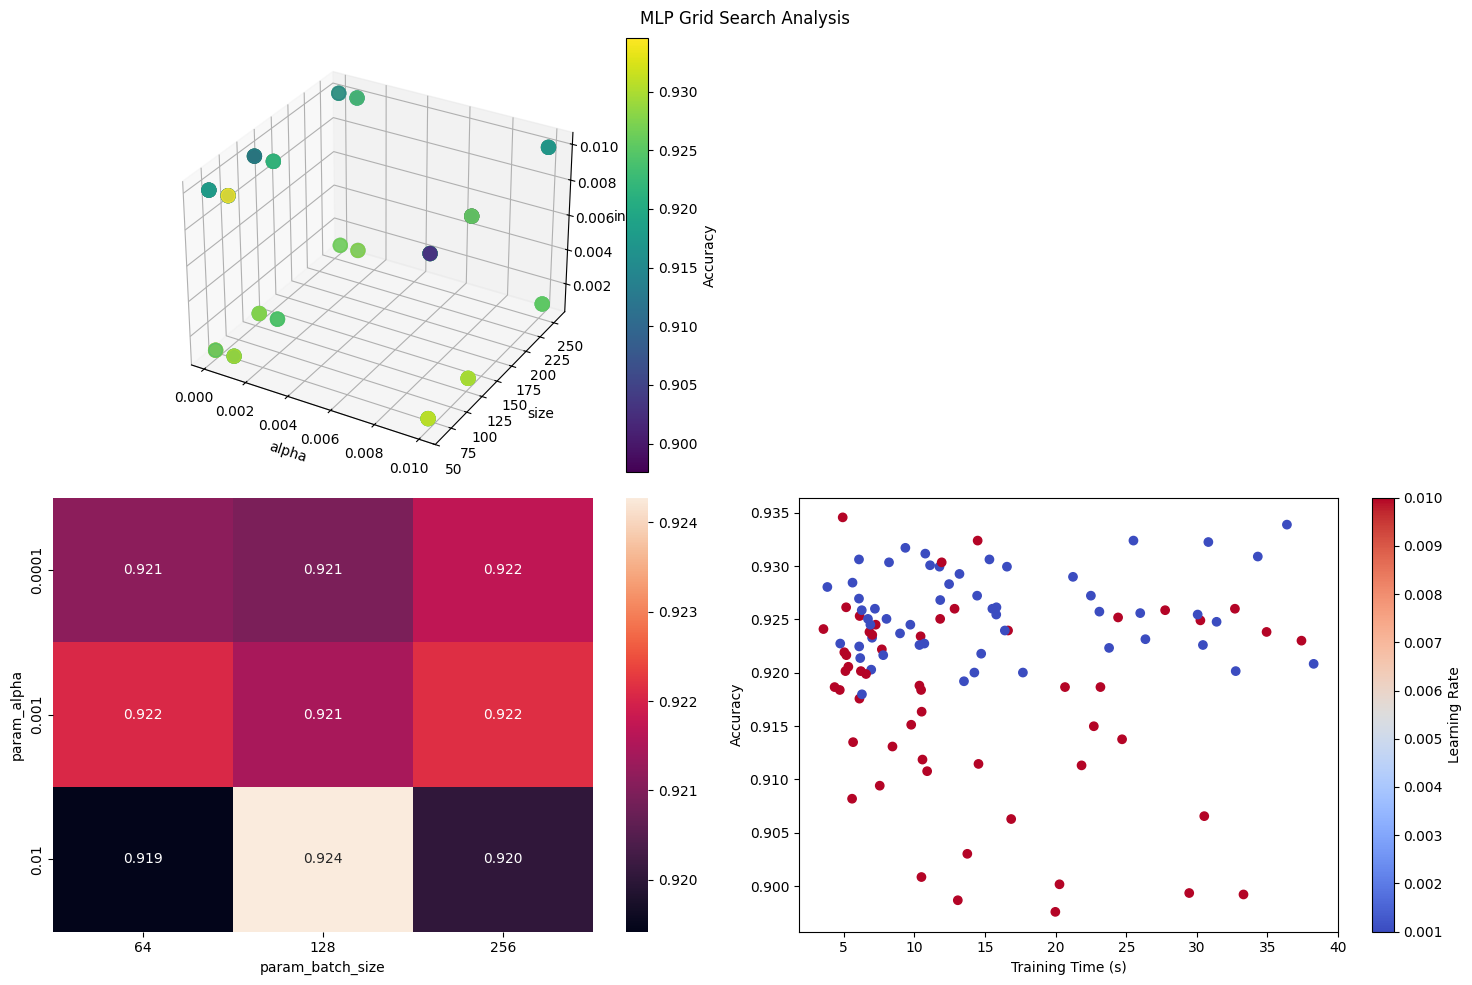

In [22]:
MODEL_CONFIG = {
    'MLP': {
        'class': MLPClassifier,
        'params': {
            'hidden_layer_sizes': (50,),
            'activation': 'relu',
            'solver': 'adam',
            'alpha': 0.0001,
            'batch_size': 128,
            'early_stopping': True,
            'max_iter': 500
        },
        'grid_params': {  # 新增网格搜索专用参数
            'hidden_layer_sizes': [(50,), (100,50), (200,100,50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01],
            'batch_size': [64, 128, 256],
            'learning_rate_init': [0.001, 0.01],
            'early_stopping': [True]
        }
    }
}

# ================== 可视化函数 ==================
def plot_grid_search_results(model_data, model_name):
    """可视化网格搜索结果的3D参数空间"""
    results = model_data['grid_results']
    
    # 转换结果为DataFrame
    df = pd.DataFrame(results.cv_results_)
    
    # 选择关键参数进行可视化
    viz_params = ['param_alpha', 'param_batch_size', 'param_learning_rate_init']
    
    plt.figure(figsize=(15, 10))
    
    # 3D散点图
    ax = plt.subplot(221, projection='3d')
    sc = ax.scatter3D(df[viz_params[0]], df[viz_params[1]], df[viz_params[2]],
                     c=df['mean_test_score'], cmap='viridis', s=100)
    ax.set_xlabel(viz_params[0].split('_')[-1])
    ax.set_ylabel(viz_params[1].split('_')[-1])
    ax.set_zlabel(viz_params[2].split('_')[-1])
    plt.colorbar(sc, label='Accuracy')
    
    
    # 热力图（alpha vs batch_size）
    plt.subplot(223)
    pivot_df = df.pivot_table(values='mean_test_score', 
                             index='param_alpha', 
                             columns='param_batch_size')
    sns.heatmap(pivot_df, annot=True, fmt=".3f")
    
    # 时间-精度曲线
    plt.subplot(224)
    plt.scatter(df['mean_fit_time'], df['mean_test_score'], c=df['param_learning_rate_init'],
               cmap='coolwarm')
    plt.xlabel('Training Time (s)')
    plt.ylabel('Accuracy')
    plt.colorbar(label='Learning Rate')
    
    plt.suptitle(f'{model_name} Grid Search Analysis')
    plt.tight_layout()
    plt.show()

# ================== 网格搜索优化函数 ==================
def improve_models_via_gridsearch(trained_models, MODEL_CONFIG, X_train, y_train):
    """执行网格搜索优化流程"""
    improved_models = {}
    
    for model_name, base_model in trained_models.items():
        if model_name not in MODEL_CONFIG:
            continue
            
        print(f"\n=== Optimizing {model_name} ===")
        config = MODEL_CONFIG[model_name]
        
        # 初始化网格搜索
        grid = GridSearchCV(
            estimator=base_model,
            param_grid=config.get('grid_params', {}),
            scoring='accuracy',
            cv=3,
            n_jobs=-1,
            verbose=2
        )
        
        # 执行搜索
        grid.fit(X_train, y_train)
        
        # 保存结果
        improved_models[model_name] = {
            'best_model': grid.best_estimator_,
            'best_params': grid.best_params_,
            'best_score': grid.best_score_,
            'grid_results': grid
        }
        
        # 可视化分析
        plot_grid_search_results(improved_models[model_name], model_name)
    
    return improved_models
    
# 初始化基准模型
base_models = {name: config['class'](**config['params']) 
                for name, config in MODEL_CONFIG.items()}
    
# 优化模型
improved_models = improve_models_via_gridsearch(
    base_models, 
    MODEL_CONFIG, 
    X_train_scaled, 
    y_train
)
    
# 保存最佳模型
for name, data in improved_models.items():
    joblib.dump(data['best_model'], f'best_{name}.pkl')